In [1]:
using HiddenMarkovModels
using DriftDiffusionModels
using Plots
using LinearAlgebra

In [2]:
# Create a true HMMDDM
true_trans = [0.9 0.1; 0.2 0.8]
true_init = [0.99, 0.01]

B₀ = 12
v₀ = 1.25
a₀ = 0.5
τ₀ = 0.5

B₁ = 2.0
v₁ = 2.0
a₁ = 0.5
τ₁ = 0.21

DDM1 = DriftDiffusionModel(B₀, v₀, a₀, τ₀, 1.0)
DDM2 = DriftDiffusionModel(B₁, v₁, a₁, τ₁, 1.0)

dists_true = [DDM1, DDM2]

hmm = HMM(true_init, true_trans, dists_true)

# sample from the true model
state_seq_true, obs_seq_true = rand(hmm, 10000)

(state_seq = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 2, 2, 2, 2, 1], obs_seq = DDMResult[DDMResult(5.572956000425072, 1), DDMResult(6.133914000503482, 1), DDMResult(3.102653000079778, 1), DDMResult(5.335006000391812, 1), DDMResult(6.966181000619814, 1), DDMResult(4.670288000298899, 1), DDMResult(0.4026419999961453, 1), DDMResult(0.7588100000009826, 1), DDMResult(0.5669519999954656, 1), DDMResult(0.6572799999980631, 1)  …  DDMResult(6.65938200057693, 1), DDMResult(2.8954840000508204, 1), DDMResult(6.380284000537919, 1), DDMResult(3.900196000191257, 1), DDMResult(4.8043760003176414, 1), DDMResult(0.5488849999949461, 1), DDMResult(0.447092999994956, 1), DDMResult(0.5691639999955292, 1), DDMResult(0.7671920000012237, 1), DDMResult(2.9260130000550877, 1)])

In [5]:
# fit a naive hmm to the data
trans_guess = [0.95 0.05; 0.05 0.95]
init_guess = [0.5, 0.5]

B_1_guess = 4.1
v1_guess = 1.0
τ_0_guess = 0.4

B_2_guess = 1.0
v2_guess = 1.0
τ_2_guess = 0.1

a_0_guess = 0.5

DDM1_guess = DriftDiffusionModel(B_1_guess, v1_guess, a_0_guess, τ_0_guess, 1.0)
DDM2_guess = DriftDiffusionModel(B_2_guess, v2_guess, a_0_guess, τ_2_guess, 1.0)

dists_guess = [DDM1_guess, DDM2_guess]

# create some priors
α₀ = ones(2)
αₜ = ones(2, 2)
# αₜ[diagind(αₜ)] .= 2.0

hmm_guess = PriorHMM(init_guess, trans_guess, dists_guess, αₜ, α₀)

hmm_est, lls = baum_welch(hmm_guess, obs_seq_true; loglikelihood_increasing=false)

(PriorHMM{Float64, DriftDiffusionModel}([1.0, 5.763299461336434e-62], [0.8986058540864739 0.10139414591352611; 0.19085540851156085 0.8091445914884392], DriftDiffusionModel[DriftDiffusionModel(13.082824130285102, 1.2953530059686738, 0.5, 0.25227300000016845, 1.0), DriftDiffusionModel(1.9927696431600312, 1.9811365995467283, 0.5, 0.20505813345129337, 1.0)], [1.0 1.0; 1.0 1.0], [1.0, 1.0]), [-30998.55866920576, -18723.84221124366, -16796.17863939132, -16534.839923801308, -16527.24590065323, -16527.234896716705, -16527.234859955126, -16527.23485981378])

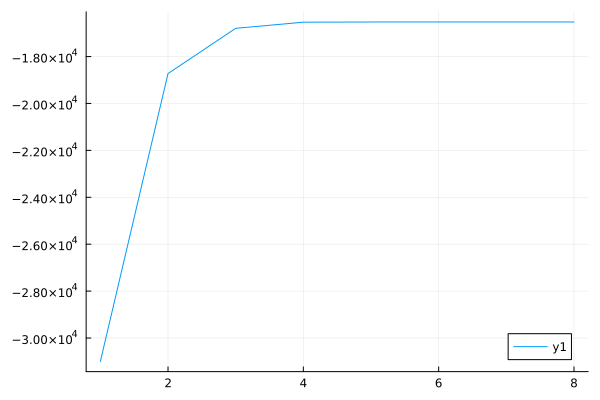

In [6]:
plot(lls)

In [8]:
posterior = forward(hmm_est, obs_seq_true)

([1.0 0.9999999783369122 … 2.538220891956611e-13 0.9626446289657985; 5.26807201441275e-68 2.1663087728397716e-8 … 0.9999999999997462 0.037355371034201564], [-16527.23485981332])

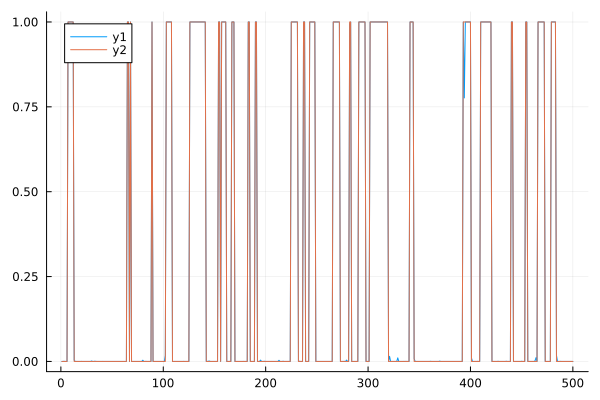

In [9]:
plot(posterior[1]'[1:500, 2])
plot!(state_seq_true[1:500] .- 1)